This is the CLASSIFICATION jupyter notebook

In [1]:
# general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [2]:
# models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RT
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# preprocessing and set up
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from imblearn.over_sampling import RandomOverSampler as ROS
from imblearn.under_sampling import RandomUnderSampler as RUS
from sklearn.model_selection import GridSearchCV

In [4]:
# scoring
from sklearn.metrics import roc_auc_score as ARS, precision_score as PS, accuracy_score as AS
from sklearn.metrics import recall_score as RS, f1_score as FS, confusion_matrix as CM
from sklearn.metrics import roc_curve as RC, roc_auc_score as RAS

In [5]:
ccfdf = pd.read_csv('creditcard.csv')
ccfdf.dropna()
ccfdf.info()
ccfdf.describe()
print(ccfdf["Class"].value_counts())
print(ccfdf.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
y = ccfdf["Class"]
X = ccfdf.drop("Class",axis = 1)
print(y.value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

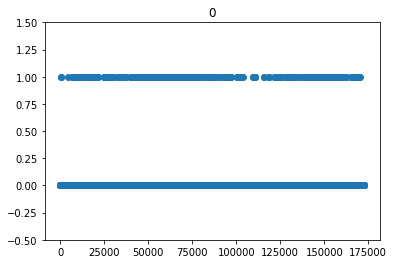

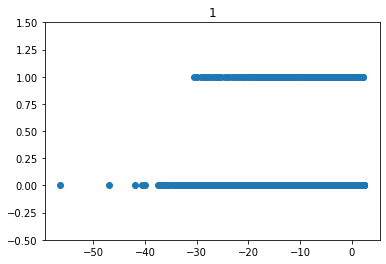

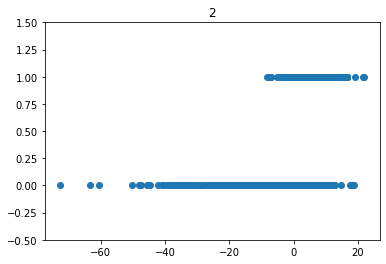

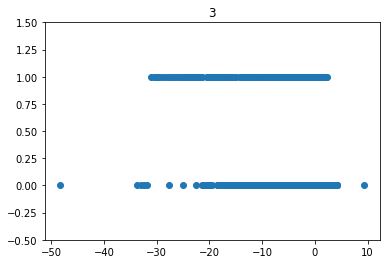

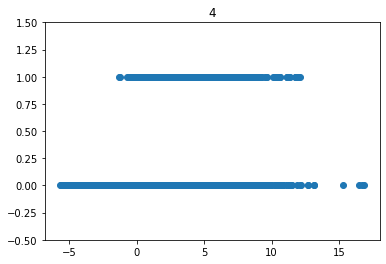

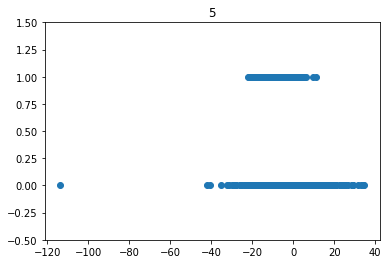

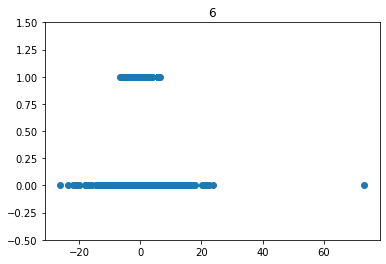

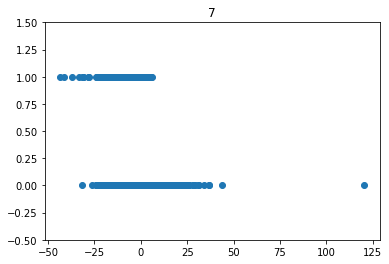

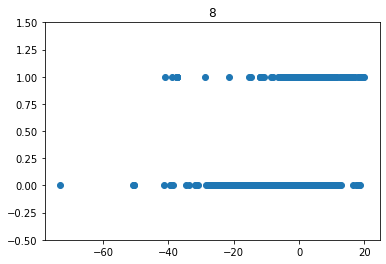

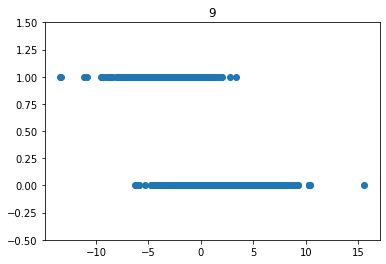

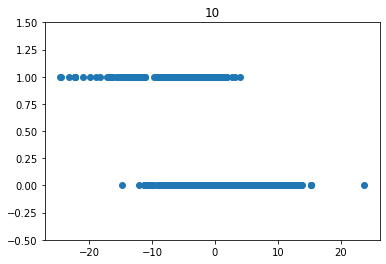

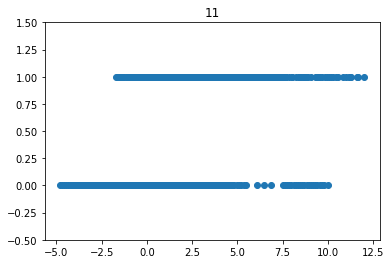

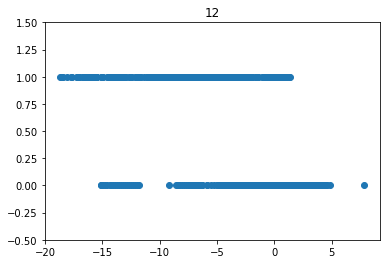

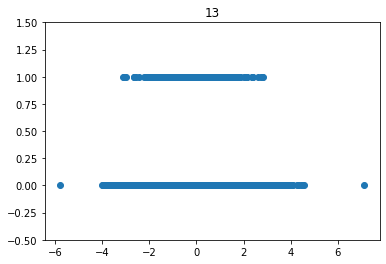

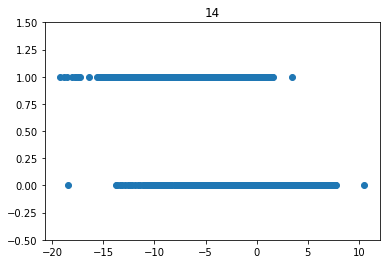

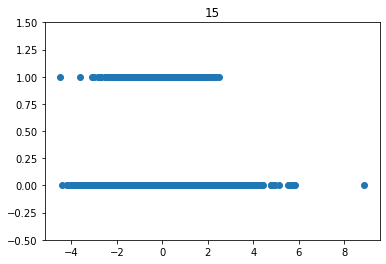

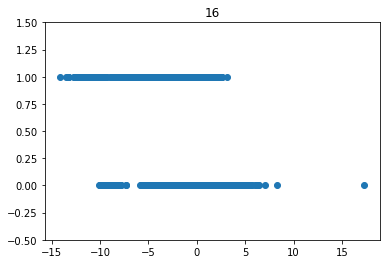

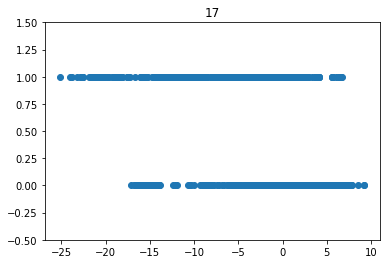

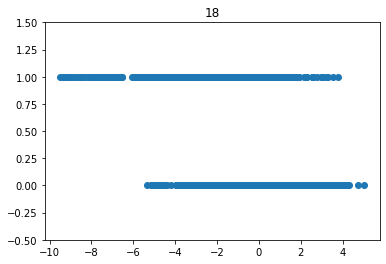

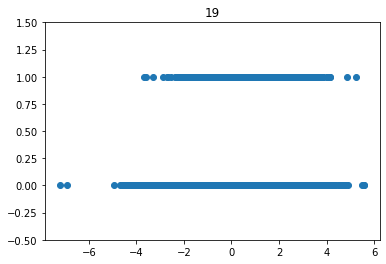

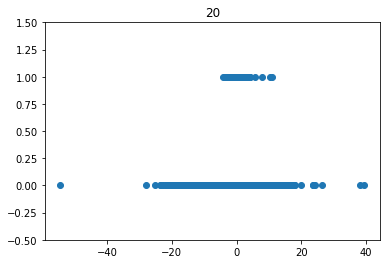

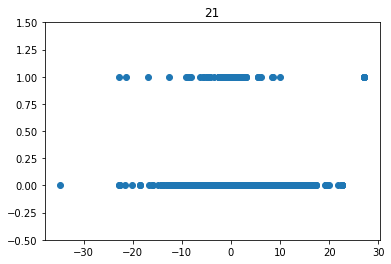

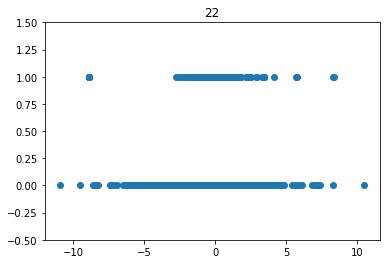

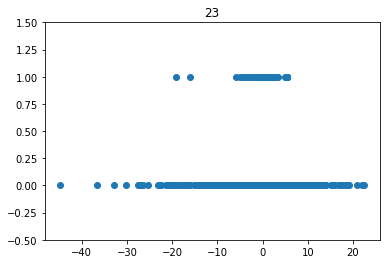

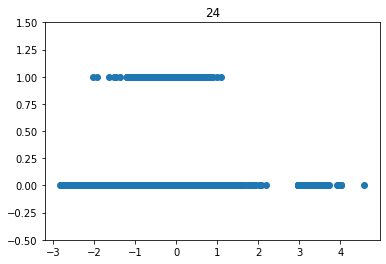

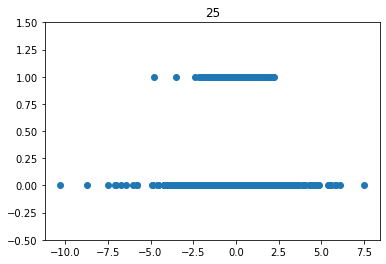

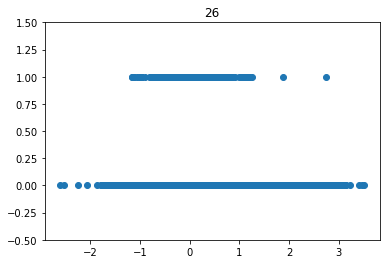

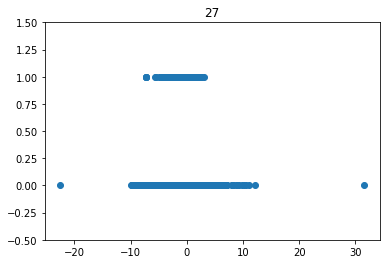

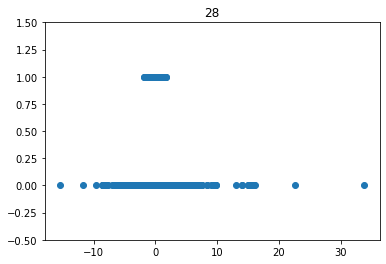

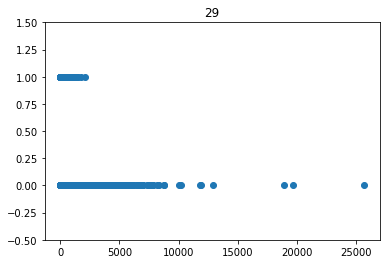

In [8]:
for i in range (0,30):
    plt.title("%d" % i)
    plt.scatter(X.iloc[:,[i]],y)
    plt.ylim(-.5,1.5)
    plt.show()

> Looking at these graphs graph "0" is not really indicative of Fraud, because the min and max of legitimate and fraudulent credit card usage is almost the same and the gaps of time where there are no fraudulent credit card use are so minimal it would do nothing to actually help train the modle. Also logically how would time affect someone trying to steal money?

In [9]:
X = X.drop("Time",axis = 1)
X.info()
X = X.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [10]:
print(X.shape)

(284807, 29)


> I am not really sure which is really better: oversampling or undersampling. From seemingly common sense it should be oversampling because one keeps all the original data, but i am not an expert. So, let us find out by using both.

In [11]:
# time to train because i want to go on a side of caution instead of 8:2 ration im going with a 7:3
x_tr_f, x_te, y_tr_f, y_te = tts(X,y, test_size = 0.3)
#over and under samplers
ros = ROS(random_state = 42) # why 42? why not 42 is the better question
rus = RUS(random_state = 42)
# resampling the training sets
xtr_os_f, ytr_os_f = ros.fit_resample(x_tr_f,y_tr_f) # (x) or (y) (TR)ain (u)ndersampled (S)ampled (F)ull
xtr_us_f, ytr_us_f = rus.fit_resample(x_tr_f,y_tr_f) # (x) or (y) (TR)ain (U)ndersampled (S)ampled (F)ull
# now for splitting for neural network i will revert to 8:2 for validation split
xtr_os, xtr_os_v, ytr_os, ytr_os_v = tts(xtr_os_f, ytr_os_f, test_size=0.2)
xtr_us, xtr_us_v, ytr_us, ytr_us_v = tts(xtr_us_f, ytr_us_f, test_size=0.2)

In [12]:
# Scaling for SVC and DNN, since decision tree aren't sensitive to feature scaling
#oversampling
scaler_os = StandardScaler()
sc_xtr_os_f = scaler_os.fit_transform(xtr_os_f)
sc_xtr_os = scaler_os.transform(xtr_os)
sc_xte_os = scaler_os.transform(x_te)
sc_xte_os_v = scaler_os.transform(xtr_os_v)
#undersampling
scaler_us = StandardScaler()
sc_xtr_us_f = scaler_us.fit_transform(xtr_us_f)
sc_xtr_us = scaler_us.transform(xtr_us)
sc_xte_us = scaler_us.transform(x_te)
sc_xte_us_v = scaler_us.transform(xtr_us_v)

> I have decided to break my classifification into 3 notebooks so i can run them while my Random forest gridsearch is running

In [13]:
print(sc_xtr_os.shape, sc_xte_os.shape, sc_xte_os_v.shape)
print(sc_xtr_us.shape, sc_xte_us.shape ,sc_xte_us_v.shape)

(318436, 29) (85443, 29) (79610, 29)
(545, 29) (85443, 29) (137, 29)


# DNN

> I am going to try a triple hiddne layer model layer 


In [14]:
# DNN for the over sampled set
os_DNN = Sequential()
os_DNN.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
os_DNN.add(Dense(units = 15, activation = 'relu'))
os_DNN.add(Dense(units = 15, activation = 'relu'))
os_DNN.add(Dense(units = 15, activation = 'relu'))
os_DNN.add(Dense(1, activation='sigmoid'))

In [15]:
# DNN for under sampled set
us_DNN = Sequential()
us_DNN.add(Dense(units = 29, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
us_DNN.add(Dense(units = 29, activation = 'softmax'))
us_DNN.add(Dense(units = 29, kernel_initializer = 'uniform', activation = 'softmax'))
us_DNN.add(Dense(units = 29, activation = 'softmax'))
us_DNN.add(Dense(units = 29, kernel_initializer = 'uniform', activation = 'softmax'))
us_DNN.add(Dense(1, activation='sigmoid'))

In [16]:
os_DNN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
us_DNN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

> so i did the math if i where to cut it down to a good size in the hundreds i can make the batch size 600 which in order to equal the same amount of samples being trained meaning batches would be 284807/600 which comes to 530.69 meaning about 531 samples

In [17]:
os_batch_size = 600
os_epochs = 530
os_history = os_DNN.fit(sc_xtr_os, ytr_os, batch_size=os_batch_size, epochs=os_epochs, validation_data=(sc_xte_os_v, ytr_os_v))

Epoch 1/530
531/531 [==============================] - 1s 2ms/step - loss: 0.1607 - accuracy: 0.9495 - val_loss: 0.0634 - val_accuracy: 0.9784
Epoch 2/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0451 - accuracy: 0.9865 - val_loss: 0.0328 - val_accuracy: 0.9917
Epoch 3/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0259 - accuracy: 0.9939 - val_loss: 0.0207 - val_accuracy: 0.9952
Epoch 4/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0177 - accuracy: 0.9960 - val_loss: 0.0156 - val_accuracy: 0.9962
Epoch 5/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0133 - accuracy: 0.9970 - val_loss: 0.0129 - val_accuracy: 0.9972
Epoch 6/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0107 - accuracy: 0.9977 - val_loss: 0.0096 - val_accuracy: 0.9981
Epoch 7/530
531/531 [==============================] - 1s 2ms/step - loss: 0.0093 - accuracy: 0.9980 - val_loss: 0.0099 - val_accuracy: 0.9978

Epoch 58/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0029 - val_accuracy: 0.9996
Epoch 59/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 60/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0088 - val_accuracy: 0.9983
Epoch 61/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 62/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0023 - val_accuracy: 0.9997
Epoch 63/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 64/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0027 - val_accuracy:

531/531 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 115/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0026 - val_accuracy: 0.9997
Epoch 116/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 117/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 118/530
531/531 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0027 - val_accuracy: 0.9996
Epoch 119/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 120/530
531/531 [==============================] - 1s 1ms/step - loss: 6.4952e-04 - accuracy: 0.9999 - val_loss: 0.0030 - val_accuracy: 0.

Epoch 170/530
531/531 [==============================] - 1s 2ms/step - loss: 3.7263e-04 - accuracy: 0.9999 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 171/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 172/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 173/530
531/531 [==============================] - 1s 1ms/step - loss: 7.6294e-04 - accuracy: 0.9998 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 174/530
531/531 [==============================] - 1s 1ms/step - loss: 4.7754e-04 - accuracy: 0.9999 - val_loss: 0.0024 - val_accuracy: 0.9997
Epoch 175/530
531/531 [==============================] - 1s 1ms/step - loss: 8.1607e-04 - accuracy: 0.9998 - val_loss: 0.0038 - val_accuracy: 0.9995
Epoch 176/530
531/531 [==============================] - 1s 1ms/step - loss: 4.4228e-04 - accuracy: 0.9999 - val_l

531/531 [==============================] - 1s 1ms/step - loss: 8.5766e-04 - accuracy: 0.9998 - val_loss: 0.0022 - val_accuracy: 0.9998
Epoch 226/530
531/531 [==============================] - 1s 2ms/step - loss: 8.1089e-04 - accuracy: 0.9999 - val_loss: 0.0022 - val_accuracy: 0.9997
Epoch 227/530
531/531 [==============================] - 1s 2ms/step - loss: 4.2111e-04 - accuracy: 0.9999 - val_loss: 0.0022 - val_accuracy: 0.9997
Epoch 228/530
531/531 [==============================] - 1s 2ms/step - loss: 8.9213e-04 - accuracy: 0.9998 - val_loss: 0.0026 - val_accuracy: 0.9996
Epoch 229/530
531/531 [==============================] - 1s 2ms/step - loss: 9.2657e-04 - accuracy: 0.9998 - val_loss: 0.0026 - val_accuracy: 0.9996
Epoch 230/530
531/531 [==============================] - 1s 1ms/step - loss: 5.0783e-04 - accuracy: 0.9999 - val_loss: 0.0027 - val_accuracy: 0.9996
Epoch 231/530
531/531 [==============================] - 1s 1ms/step - loss: 5.8693e-04 - accuracy: 0.9999 - val_loss: 0

531/531 [==============================] - 1s 2ms/step - loss: 3.4235e-04 - accuracy: 0.9999 - val_loss: 0.0026 - val_accuracy: 0.9997
Epoch 281/530
531/531 [==============================] - 1s 1ms/step - loss: 4.2369e-04 - accuracy: 0.9999 - val_loss: 0.0031 - val_accuracy: 0.9996
Epoch 282/530
531/531 [==============================] - 1s 1ms/step - loss: 5.7828e-04 - accuracy: 0.9999 - val_loss: 0.0025 - val_accuracy: 0.9997
Epoch 283/530
531/531 [==============================] - 1s 1ms/step - loss: 6.2719e-04 - accuracy: 0.9999 - val_loss: 0.0022 - val_accuracy: 0.9997
Epoch 284/530
531/531 [==============================] - 1s 1ms/step - loss: 3.9672e-04 - accuracy: 0.9999 - val_loss: 0.0026 - val_accuracy: 0.9997
Epoch 285/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0029 - val_accuracy: 0.9996
Epoch 286/530
531/531 [==============================] - 1s 1ms/step - loss: 6.9396e-04 - accuracy: 0.9999 - val_loss: 0.003

531/531 [==============================] - 1s 1ms/step - loss: 9.2462e-04 - accuracy: 0.9998 - val_loss: 0.0022 - val_accuracy: 0.9997
Epoch 336/530
531/531 [==============================] - 1s 1ms/step - loss: 2.3807e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9997
Epoch 337/530
531/531 [==============================] - 1s 1ms/step - loss: 1.9027e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 0.9998
Epoch 338/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 339/530
531/531 [==============================] - 1s 1ms/step - loss: 4.9747e-04 - accuracy: 0.9999 - val_loss: 0.0034 - val_accuracy: 0.9996
Epoch 340/530
531/531 [==============================] - 1s 1ms/step - loss: 2.1066e-04 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9997
Epoch 341/530
531/531 [==============================] - 1s 1ms/step - loss: 1.7282e-04 - accuracy: 1.0000 - val_loss: 0.003

531/531 [==============================] - 1s 1ms/step - loss: 4.0588e-04 - accuracy: 0.9999 - val_loss: 0.0027 - val_accuracy: 0.9997
Epoch 391/530
531/531 [==============================] - 1s 1ms/step - loss: 2.5412e-04 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9997
Epoch 392/530
531/531 [==============================] - 1s 1ms/step - loss: 7.2120e-04 - accuracy: 0.9998 - val_loss: 0.0031 - val_accuracy: 0.9996
Epoch 393/530
531/531 [==============================] - 1s 1ms/step - loss: 4.4925e-04 - accuracy: 0.9999 - val_loss: 0.0027 - val_accuracy: 0.9996
Epoch 394/530
531/531 [==============================] - 1s 1ms/step - loss: 2.8520e-04 - accuracy: 0.9999 - val_loss: 0.0028 - val_accuracy: 0.9997
Epoch 395/530
531/531 [==============================] - 1s 1ms/step - loss: 1.5381e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 0.9996
Epoch 396/530
531/531 [==============================] - 1s 1ms/step - loss: 1.7944e-04 - accuracy: 1.0000 - val_loss: 0

531/531 [==============================] - 1s 1ms/step - loss: 1.9119e-04 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 0.9996
Epoch 446/530
531/531 [==============================] - 1s 1ms/step - loss: 4.9797e-04 - accuracy: 0.9999 - val_loss: 0.0025 - val_accuracy: 0.9997
Epoch 447/530
531/531 [==============================] - 1s 1ms/step - loss: 1.6515e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 0.9996
Epoch 448/530
531/531 [==============================] - 1s 1ms/step - loss: 8.3657e-04 - accuracy: 0.9998 - val_loss: 0.0025 - val_accuracy: 0.9997
Epoch 449/530
531/531 [==============================] - 1s 1ms/step - loss: 1.2948e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9996
Epoch 450/530
531/531 [==============================] - 1s 1ms/step - loss: 1.4074e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 0.9996
Epoch 451/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.003

531/531 [==============================] - 1s 1ms/step - loss: 1.7434e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9997
Epoch 501/530
531/531 [==============================] - 1s 1ms/step - loss: 1.7698e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9996
Epoch 502/530
531/531 [==============================] - 1s 1ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0030 - val_accuracy: 0.9996
Epoch 503/530
531/531 [==============================] - 1s 1ms/step - loss: 4.1323e-04 - accuracy: 0.9999 - val_loss: 0.0023 - val_accuracy: 0.9997
Epoch 504/530
531/531 [==============================] - 1s 1ms/step - loss: 1.7580e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9996
Epoch 505/530
531/531 [==============================] - 1s 1ms/step - loss: 1.6634e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9996
Epoch 506/530
531/531 [==============================] - 1s 1ms/step - loss: 3.9138e-04 - accuracy: 0.9999 - val_loss: 0.004

In [18]:
us_batch_size = 5
us_epochs = 30
us_history = us_DNN.fit(sc_xtr_us, ytr_us, batch_size=us_batch_size, epochs=us_epochs, validation_data=(sc_xte_us_v, ytr_us_v))

Epoch 1/30
109/109 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5046 - val_loss: 0.6936 - val_accuracy: 0.4818
Epoch 2/30
109/109 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5046 - val_loss: 0.6936 - val_accuracy: 0.4818
Epoch 3/30
109/109 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6935 - val_accuracy: 0.4818
Epoch 4/30
109/109 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6936 - val_accuracy: 0.4818
Epoch 5/30
109/109 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5046 - val_loss: 0.6936 - val_accuracy: 0.4818
Epoch 6/30
109/109 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4826 - val_loss: 0.6936 - val_accuracy: 0.4818
Epoch 7/30
109/109 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5046 - val_loss: 0.6936 - val_accuracy: 0.4818
Epoch 

In [19]:
# over sampled prediction and confusion matrix
print("confusion matrix for oversampling")
os_DNN_pred = os_DNN.predict(sc_xte_os)
os_DNN_pred = (os_DNN_pred > 0.5)
print(CM(y_te, os_DNN_pred))

confusion matrix for oversampling
[[85241    51]
 [   37   114]]


In [20]:
print("confusion matrix for undersampling")
us_DNN_pred = us_DNN.predict(sc_xte_os)
us_DNN_pred = (us_DNN_pred > 0.5)
print(CM(y_te, us_DNN_pred))

confusion matrix for undersampling
[[82231  3061]
 [   16   135]]


In [21]:
print("Scoring for oversampling:")
print('Accuracy: {}'.format(AS(y_te, os_DNN_pred)))
print('Precision: {}'.format(PS(y_te, os_DNN_pred)))
print('Recall: {}'.format(RS(y_te, os_DNN_pred)))
print('F1 Score: {}'.format(FS(y_te, os_DNN_pred)))

Scoring for oversampling:
Accuracy: 0.9989700736163291
Precision: 0.6909090909090909
Recall: 0.7549668874172185
F1 Score: 0.7215189873417722


In [22]:
print("Scoring for undersampling:")
print('Accuracy: {}'.format(AS(y_te, us_DNN_pred)))
print('Precision: {}'.format(PS(y_te, us_DNN_pred)))
print('Recall: {}'.format(RS(y_te, us_DNN_pred)))
print('F1 Score: {}'.format(FS(y_te, us_DNN_pred)))

Scoring for undersampling:
Accuracy: 0.9639876876982316
Precision: 0.04224030037546934
Recall: 0.8940397350993378
F1 Score: 0.0806692560501942


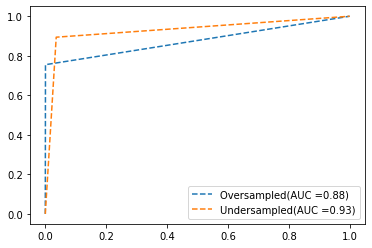

In [23]:
# lets plot the roc curves and document the area under the curve
os_DNN_fpr, os_DNN_tpr, _ = RC(y_te, os_DNN_pred.ravel())
os_DNN_auc = RAS(y_te, os_DNN_pred)
plt.plot(os_DNN_fpr, os_DNN_tpr, linestyle='--', label = "Oversampled(AUC =%.2f)" % os_DNN_auc)
us_DNN_fpr, us_DNN_tpr, _ = RC(y_te, us_DNN_pred.ravel())
us_DNN_auc = RAS(y_te, us_DNN_pred)
plt.plot(us_DNN_fpr, us_DNN_tpr, linestyle='--', label = "Undersampled(AUC =%.2f)" % us_DNN_auc)
plt.legend()